
<img src=https://static.casadomo.com/media/2020/02/lonmark-espana-universidad-valencia-jornada-automatizacion.png width="300">


# Aprendizaje máquina II: t-SNE

Yolanda Vives Gilabert

Este notebook demuestra el funcionamiento básico de la librería openTSNE:
https://opentsne.readthedocs.io/en/latest/examples/01_simple_usage/01_simple_usage.html

Bajarse el fichero utils de https://github.com/pavlin-policar/openTSNE/blob/master/examples/utils.py

In [1]:
from openTSNE import TSNE
from resources import utils
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#### Cargar datos

En este ejemplo se utiliza el dataset Macosko 2015, que son datos de retina de ratón. Se trata de un dataset bastante conocido y bastante explorado en la literatura. Se puede obtener en el siguiente enlace: http://file.biolab.si/opentsne/macosko_2015.pkl.gz

In [2]:
import gzip
import pickle

with gzip.open("data/macosko_2015.pkl.gz", "rb") as f:
    data = pickle.load(f)

x = data["pca_50"]
y = data["CellType1"].astype(str)

print("Data set contains %d samples with %d features" % x.shape)

Data set contains 44808 samples with 50 features


#### Crear train/test split

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

print("%d training samples" % x_train.shape[0])
print("%d test samples" % x_test.shape[0])

30021 training samples
14787 test samples


#### Run t-SNE
Primero se creará un embedding de los datos. En el siguiente enlace encontrarás los parámetros de entrada de la función tsne.

https://opentsne.readthedocs.io/en/latest/api/index.html


In [9]:
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

--------------------------------------------------------------------------------
TSNE(n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 16.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.88 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.32 seconds
===> Running optimization with exaggeration=12.00, lr=2501.75 for 250 iterations...
Iteration   50, KL divergence 5.8110, 50 iterations in 7.3301 sec
Iteration  100, KL divergence 5.2271, 50 iterations in 7.3818 sec
Iteration  150, KL divergence 5.1346, 50 iterations in 7.4141 sec
Iteration  200, KL divergence 5.0972, 50 iterations in 7.5959 sec
Iteration  250, KL divergence 5.0772, 50 iterations in 7.4882 sec
   --> Time elapsed: 37.21 seconds
===> Running optimization with exaggeration=1.00, lr=2501.75 for 5

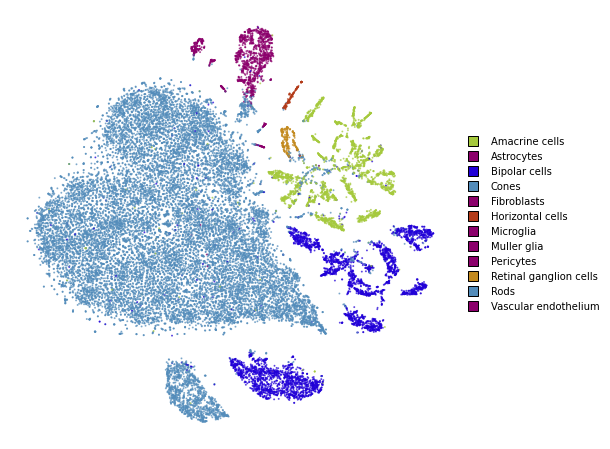

In [10]:
%time embedding_train = tsne.fit(x_train)

utils.plot(embedding_train, y_train, colors=utils.MACOSKO_COLORS)

#### Transformación

Actualmente openTSNE es la única librería que permite meter en el `embedding` nuevos puntos. 

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 5.89 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.13 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 214722.3346, 50 iterations in 1.4559 sec
Iteration  100, KL divergence 213246.7080, 50 iterations in 1.3137 sec
Iteration  150, KL divergence 212323.3294, 50 iterations in 1.3176 sec
Iteration  200, KL divergence 211686.2697, 50 iterations in 1.3455 sec
Iteration  250, KL divergence 211208.7615, 50 iterations in 1.4914 sec
   --> Time elapsed: 6.92 seconds
Wall time: 15.5 s


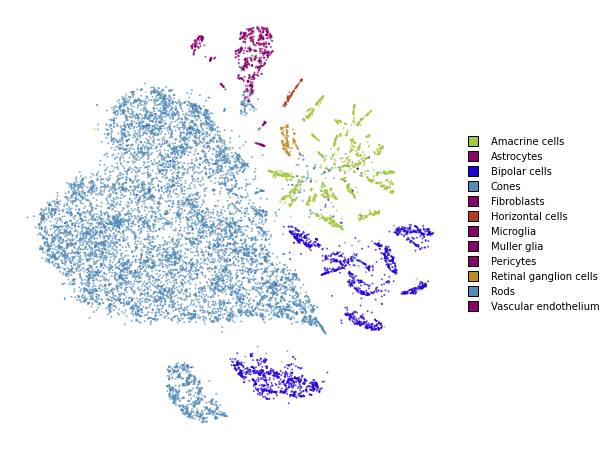

In [11]:
%time embedding_test = embedding_train.transform(x_test)

utils.plot(embedding_test, y_test, colors=utils.MACOSKO_COLORS)


#### Todo junto

Superimpone los puntos transformados en el `embedding`original. 

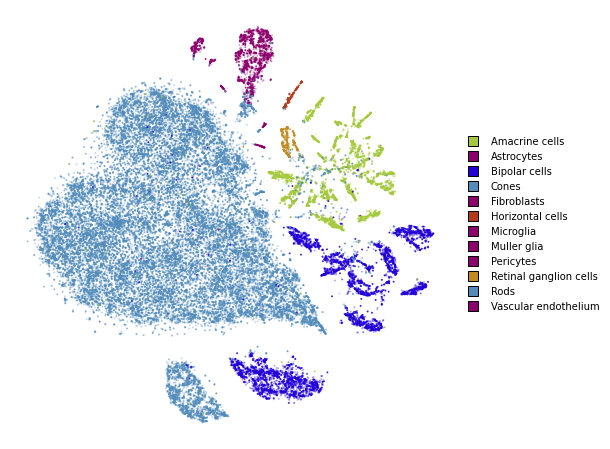

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
utils.plot(embedding_train, y_train, colors=utils.MACOSKO_COLORS, alpha=0.25, ax=ax)
utils.plot(embedding_test, y_test, colors=utils.MACOSKO_COLORS, alpha=0.75, ax=ax)

## Hands-on

Aplica el modelo t-SNE al dataset MNIST. 

#### Load data 
Load MNIST dataset: https://www.kaggle.com/weiouyang/test-dataset/version/1

(60000, 28, 28)
(60000,)


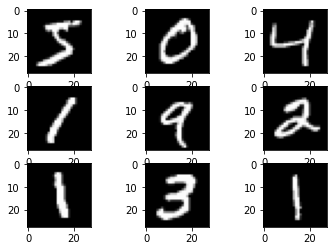

In [2]:
import gzip
import pickle
import sys
import matplotlib.pyplot as plt

f = gzip.open('data/mnist.pkl.gz', 'rb')
if sys.version_info < (3,):
    (X_train, y_train), (X_test, y_test) = pickle.load(f)
else:
    (X_train0, y_train), (X_test0, y_test) = pickle.load(f, encoding="bytes")
    
print(X_train0.shape)
print(y_train.shape)

for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train0[i], cmap=plt.get_cmap('gray'))



#### 1.- Empieza ejecutando la función con los valores por defecto (perplexity = 30, early_exaggeration = 12, initialization='pca')  para un subconjunto de train del 75% de la muestra.

In [3]:
tsne2 = TSNE(perplexity = 30, early_exaggeration = 12, initialization='pca', verbose = True)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train0, y_train, test_size=0.25, random_state=42)

X_train2 = X_train2.reshape(45000,-1)


In [6]:
%time emmbeding2 = tsne2.fit(X_train2)


--------------------------------------------------------------------------------
TSNE(verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 115.11 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 11.40 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 1.85 seconds
===> Running optimization with exaggeration=12.00, lr=3750.00 for 250 iterations...
Iteration   50, KL divergence 6.2537, 50 iterations in 14.6355 sec
Iteration  100, KL divergence 5.7546, 50 iterations in 14.0079 sec
Iteration  150, KL divergence 5.6364, 50 iterations in 15.2284 sec
Iteration  200, KL divergence 5.5863, 50 iterations in 13.7914 sec
Iteration  250, KL divergence 5.5605, 50 iterations in 14.3440 sec
   --> Time elapsed: 72.01 seconds
===> Running optimization with exaggeration=1.00, lr=3750.00 for 500 iterations...
Ite

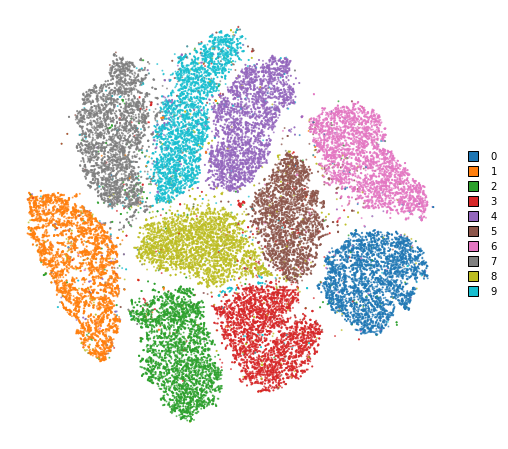

In [7]:
utils.plot(emmbeding2, y_train2)

#### 2.- Ejecuta el model sin early_exaggeration (early_exaggeration=1). ¿Qué diferencias observas y a qué se deben?

In [7]:
tsne2 = TSNE(perplexity = 30, early_exaggeration = 1, initialization='pca', verbose = True)

%time emmbeding2 = tsne2.fit(X_train2)



--------------------------------------------------------------------------------
TSNE(early_exaggeration=1, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 52.81 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 3.90 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.94 seconds
===> Running optimization with exaggeration=1.00, lr=3750.00 for 250 iterations...
Iteration   50, KL divergence 4.9122, 50 iterations in 6.0788 sec
Iteration  100, KL divergence 4.0476, 50 iterations in 6.0723 sec
Iteration  150, KL divergence 3.6755, 50 iterations in 6.1488 sec
Iteration  200, KL divergence 3.4570, 50 iterations in 6.1340 sec
Iteration  250, KL divergence 3.3090, 50 iterations in 6.2583 sec
   --> Time elapsed: 30.69 seconds
===> Running optimization with exaggeration=1.00, lr=3750.00 for 500 ite

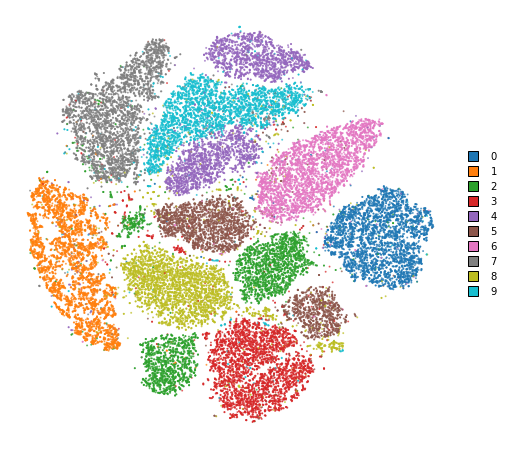

In [8]:
utils.plot(emmbeding2, y_train2)

## Observaciones 

Vemos que algunos clusters no han podido ser distrubuidos conjuntamente, sino que se han separado en varios. Nos damos cuenta pues de la importancia de definir el parametro `early_exagerastion` alto ~12. De este modo se aumentan las fuerzas de atracción entre puntos, permitiendo que los puntos se muevan más libremente para encontrar sus verdaderos vecinos.

#### 3.- Ejecuta el model con los valores por defecto pero cambiando la inicialización a `random`. ¿Qué ocurre? ¿Obtenemos mejores o peores resultados que en el caso anterior? Compara también los tiempos de ejecución y comenta porqué difieren.

In [4]:
tsne2 = TSNE(perplexity = 30, initialization='random', verbose = True)

%time emmbeding2 = tsne2.fit(X_train2)



--------------------------------------------------------------------------------
TSNE(initialization='random', verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 115.45 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 9.49 seconds
===> Running optimization with exaggeration=12.00, lr=3750.00 for 250 iterations...
Iteration   50, KL divergence 7.0978, 50 iterations in 13.7850 sec
Iteration  100, KL divergence 5.9616, 50 iterations in 14.6601 sec
Iteration  150, KL divergence 5.6973, 50 iterations in 14.3795 sec
Iteration  200, KL divergence 5.6104, 50 iterations in 14.3857 sec
Iteration  250, KL divergence 5.5708, 50 iterations in 14.8953 sec
   --> Time elapsed: 72.11 seconds
===> Running optimization with exaggeration=1.00, lr=3750.00 for 500 iterations...
Iteration   50, KL divergence 3.9786, 50 iterations in 13.

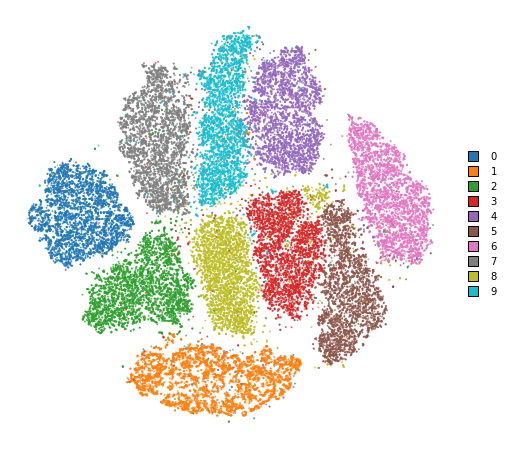

In [5]:

utils.plot(emmbeding2, y_train2)

##  Observaciones 

Vemos que los resultados son muy parecidos, con tiempo de ejecucción tambien muy similares. En la explicacion de los dife tes métodos de inicialización definian la PCA como más estable globalmente, mientras que la random podia ser un poco menos estable. Esto quizas sea la razón por la que algunos clusters que estaban juntos con inicialización en PCA no lo estan en random. 



#### 4.- Ejecuta el modelo con 2 valores muy dispares de perplexity, por ejemplo 1 y 100, (y el resto de valores por defecto) y comenta los resultados.

--------------------------------------------------------------------------------
TSNE(perplexity=1, verbose=True)
--------------------------------------------------------------------------------
===> Finding 3 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 19.31 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.19 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 1.00 seconds
===> Running optimization with exaggeration=12.00, lr=3750.00 for 250 iterations...
Iteration   50, KL divergence 9.2796, 50 iterations in 2.2076 sec
Iteration  100, KL divergence 8.1460, 50 iterations in 2.2976 sec
Iteration  150, KL divergence 7.7112, 50 iterations in 2.4227 sec
Iteration  200, KL divergence 7.4423, 50 iterations in 2.2798 sec
Iteration  250, KL divergence 7.2491, 50 iterations in 2.2498 sec
   --> Time elapsed: 11.46 seconds
===> Running optimization with exaggeration=1.00, lr=3750.00 for 500 iterations.

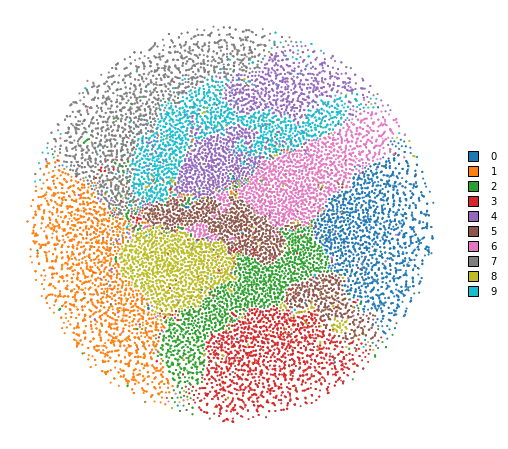

In [11]:
## 1 
tsne2 = TSNE(perplexity = 1, verbose = True)

%time emmbeding2 = tsne2.fit(X_train2)
utils.plot(emmbeding2, y_train2)

--------------------------------------------------------------------------------
TSNE(perplexity=100, verbose=True)
--------------------------------------------------------------------------------
===> Finding 300 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 112.56 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 13.80 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 1.01 seconds
===> Running optimization with exaggeration=12.00, lr=3750.00 for 250 iterations...
Iteration   50, KL divergence 5.2686, 50 iterations in 14.8857 sec
Iteration  100, KL divergence 5.0223, 50 iterations in 14.5970 sec
Iteration  150, KL divergence 5.0059, 50 iterations in 15.3702 sec
Iteration  200, KL divergence 5.0041, 50 iterations in 15.3707 sec
Iteration  250, KL divergence 5.0037, 50 iterations in 15.1094 sec
   --> Time elapsed: 75.33 seconds
===> Running optimization with exaggeration=1.00, lr=3750.00 for 500 

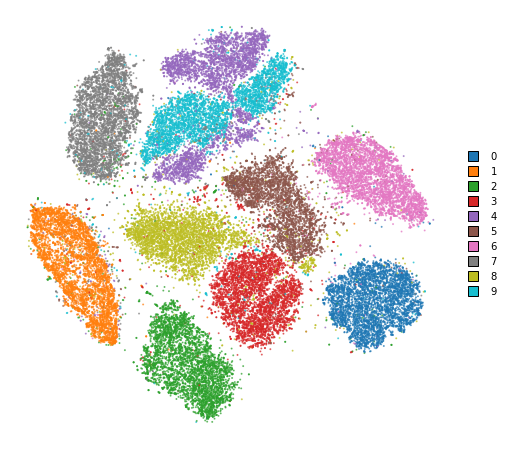

In [12]:
## 100 
tsne2 = TSNE(perplexity = 100, verbose = True)

%time emmbeding2 = tsne2.fit(X_train2)
utils.plot(emmbeding2, y_train2)

## Observaciones 

Como era de esperar, a valores altos de perplexity, el tiempo de ejecución aumenta de forma considerable.

Vemos que para el valor muy pequeño `perplexity = 1`, estamos analizando el set de manera muy local, solo atendiendo a 1 punto en cada kernel, esto provoca un ajuste tan malo como el obtenido. 

En cambio, vemos que para `perplexity = 100` el ajuste es mucho mejor, no obstante, es un valor grande para lo que sre suele utilizar, pero como en este caso nuestro data set es muy grande, no perdemos generalización.

#### 5.- De todas las configuraciones de t-SNE probadas en los ejercicios anteriores, escoge la que mejores resultados obtiene y aplica al embedding a los datos de test. Representa el dataset entero.

en la que mejor resultados obtenemos en el primer t-SNE realizado. Lo repetimos

In [8]:
 tsne2 = TSNE(perplexity = 30, early_exaggeration = 12, initialization='pca', verbose = True)

In [13]:
X_train0 = X_train0.reshape(60000,-1)
%time emmbeding2 = tsne2.fit(X_train0)

--------------------------------------------------------------------------------
TSNE(verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 143.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 12.20 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 2.17 seconds
===> Running optimization with exaggeration=12.00, lr=5000.00 for 250 iterations...
Iteration   50, KL divergence 6.4991, 50 iterations in 16.6744 sec
Iteration  100, KL divergence 5.9682, 50 iterations in 16.7022 sec
Iteration  150, KL divergence 5.8311, 50 iterations in 16.9622 sec
Iteration  200, KL divergence 5.7693, 50 iterations in 16.8296 sec
Iteration  250, KL divergence 5.7357, 50 iterations in 16.7874 sec
   --> Time elapsed: 83.97 seconds
===> Running optimization with exaggeration=1.00, lr=5000.00 for 500 iterations...
Ite

In [20]:
X_test0 = X_test0.reshape(10000,-1)
%time embedding_test = emmbeding2.transform(X_test0)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 9.02 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.31 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 142966.7472, 50 iterations in 0.7266 sec
Iteration  100, KL divergence 141916.0070, 50 iterations in 0.7702 sec
Iteration  150, KL divergence 141336.5962, 50 iterations in 0.7348 sec
Iteration  200, KL divergence 140972.9354, 50 iterations in 0.7048 sec
Iteration  250, KL divergence 140711.8874, 50 iterations in 0.7239 sec
   --> Time elapsed: 3.66 seconds
Wall time: 16.5 s


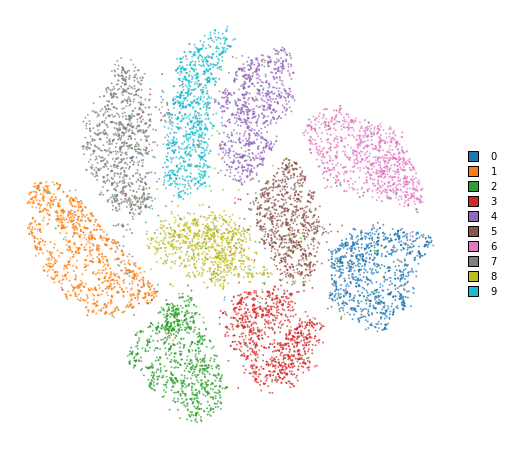

In [36]:

utils.plot(embedding_test,y_test)


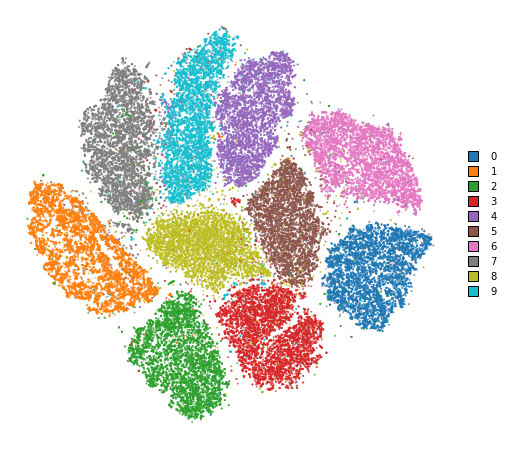

In [37]:
# ploteamos todo el data set
utils.plot(np.concatenate((embedding_test,emmbeding2)),np.concatenate((y_test,y_train)))
#utils.plot(emmbeding2,y_train)